In [1]:
from torchvision.datasets import FashionMNIST as fm
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F

# Device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
lr = 1e-3
batch_size = 1024
n_epoch = 50

In [3]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize()
])
data_root = '/content/drive/Othercomputers/我的 MacBook Air/FasionMNIST'

fm_train = fm(root = data_root, train = True, download = False, transform = img_transform)
train_data = DataLoader(fm_train, batch_size = batch_size, shuffle = False)
fm_test = fm(root = data_root, train = False, download = False, transform = img_transform)
test_data = DataLoader(fm_test, batch_size = batch_size, shuffle = False)

In [4]:
class VAE_autoencoder(nn.Module):
    def __init__(self):
        super(VAE_autoencoder, self).__init__()
        
        #define encoder & decoder
        
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 20),
            nn.ReLU(),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(12, 20),
            nn.ReLU(),
            nn.Linear(20, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )
        
        self.fc_m = nn.Linear(20,12)
        self.fc_sigma = nn.Linear(20,12)
        
    def forward(self, x):
        code = x.view(x.size(0), -1)
        code = self.encoder(code)
        
        # m, sigma
        m = self.fc_m(code)
        sigma = self.fc_sigma(code)
        
        # define e
        e = torch.randn_like(sigma)
        
        #define c
        c = torch.exp(sigma) * e + m
        output = self.decoder(c)
        output = output.view(x.size(0), 1, 28, 28)
        
        return output, m, sigma

In [5]:
model = VAE_autoencoder().to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
print("strat training....")

strat training....


In [6]:
losses = []
for epoch in range(n_epoch):
     
    #trianing Net
    for batch_idx, (real_image, _) in enumerate(train_data):
        
        real_image = real_image.to(device)
        
        fake_image, m, sigma = model(real_image)
        
        KLD = 0.5 * torch.sum(
            torch.pow(m, 2) +
            torch.pow(sigma, 2) -
            torch.log(1e-8 + torch.pow(sigma, 2)) - 1
        ) / (real_image.size(0)*28*28)
        KLD = KLD.to(device)
        
        MSE = criterion(fake_image, real_image)
        
        loss = KLD + MSE
        
        # updata parametor
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data)
    print('epoch is: {}, Loss is:{:.4f}'.format(epoch+1, loss.data))
    
    real_image, _ = iter(test_data).next()
    real_image = real_image.to(device)
    fake_image, _, _ = model(real_image)
    
    #joint
    
    #save image
    
    #save_image(image, ./path())
    

#save_model
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/model/Linear_VAE.pth')

epoch is: 1, Loss is:0.0892
epoch is: 2, Loss is:0.0696
epoch is: 3, Loss is:0.0630
epoch is: 4, Loss is:0.0482
epoch is: 5, Loss is:0.0444
epoch is: 6, Loss is:0.0418
epoch is: 7, Loss is:0.0401
epoch is: 8, Loss is:0.0391
epoch is: 9, Loss is:0.0384
epoch is: 10, Loss is:0.0376
epoch is: 11, Loss is:0.0375
epoch is: 12, Loss is:0.0370
epoch is: 13, Loss is:0.0363
epoch is: 14, Loss is:0.0360
epoch is: 15, Loss is:0.0349
epoch is: 16, Loss is:0.0350
epoch is: 17, Loss is:0.0342
epoch is: 18, Loss is:0.0343
epoch is: 19, Loss is:0.0337
epoch is: 20, Loss is:0.0328
epoch is: 21, Loss is:0.0326
epoch is: 22, Loss is:0.0320
epoch is: 23, Loss is:0.0315
epoch is: 24, Loss is:0.0316
epoch is: 25, Loss is:0.0313
epoch is: 26, Loss is:0.0310
epoch is: 27, Loss is:0.0307
epoch is: 28, Loss is:0.0307
epoch is: 29, Loss is:0.0307
epoch is: 30, Loss is:0.0302
epoch is: 31, Loss is:0.0304
epoch is: 32, Loss is:0.0302
epoch is: 33, Loss is:0.0303
epoch is: 34, Loss is:0.0302
epoch is: 35, Loss is:0

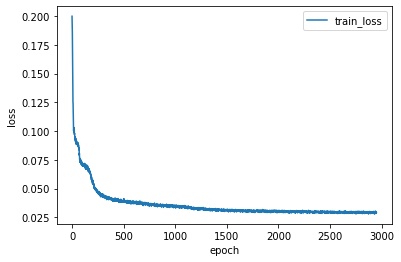

In [7]:
import matplotlib.pyplot as plt

plt.figure()
losses = [n.cpu() for n in losses]
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss',)
plt.legend(['train_loss'])
plt.show()

In [8]:
model_1 = torch.load('/content/drive/MyDrive/Colab Notebooks/model/Linear_VAE.pth')
model_1

VAE_autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=20, bias=True)
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=12, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=784, bias=True)
    (9): Sigmoid()
  )
  (fc_m): Linear(in_features=20, out_features=12, bias=True)
  (fc_sigma): Linear(in_features=20, out_features=12, bias=True)
)

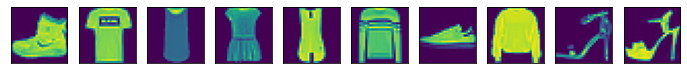

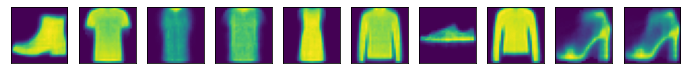

In [9]:
samples_in, samples_out = [], []
def show_fm(images):
    _, figs = plt.subplots(1, len(images), figsize = (12,12))
    for f, img in zip(figs, images):
        f.imshow(img.squeeze())
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
for i in range(10):
    samples_in.append(fm_train[i][0])
    sample_out,_,_ = model_1((fm_train[i][0]).reshape([1, fm_train[i][0].shape[0], fm_train[i][0].shape[1], fm_train[i][0].shape[2]]).to(device))
    sample_out = sample_out.cpu().detach().numpy()
    samples_out.append(sample_out)
show_fm(samples_in)
show_fm(samples_out)
